# Exploratory data analysis 
#### Hold-on split at 2025-01-01
#### Time intervals: 1-min, 10-min, 1-hour, 1-day



########## Split: 2025-01-01 ##########

--- Interval: 1min ---

=== Train (2025-01-01) EDA for BNBUSDT @ 1min ===
Total samples: 2103840
Target distribution:
target_direction
0    0.585878
1    0.414122
Name: proportion, dtype: float64

Price summary:
           count        mean         std      min        25%     50%    75%  \
open   2103840.0  378.031363  150.398328  35.0956  269.74305  324.20  520.1   
high   2103840.0  378.264177  150.480718  35.2507  269.90000  324.36  520.4   
low    2103840.0  377.774885  150.314245  35.0374  269.60000  324.00  519.7   
close  2103840.0  378.026702  150.398692  35.1142  269.70000  324.20  520.1   

          max  
open   793.29  
high   793.86  
low    792.39  
close  793.28  

First 3 rows:
   coin_id           timestamp     open     high      low    close    volume  \
0  BNBUSDT 2021-01-01 00:00:00  37.3596  37.3702  37.3381  37.3700   807.624   
1  BNBUSDT 2021-01-01 00:01:00  37.3700  37.4221  37.3487  37.3910  2734.241   
2  BNBUSDT 202

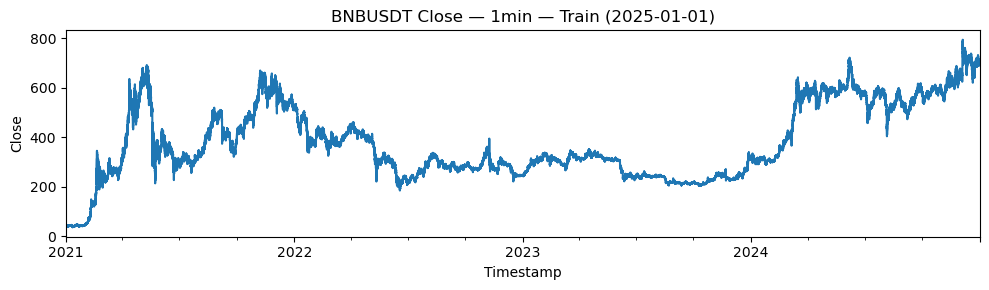

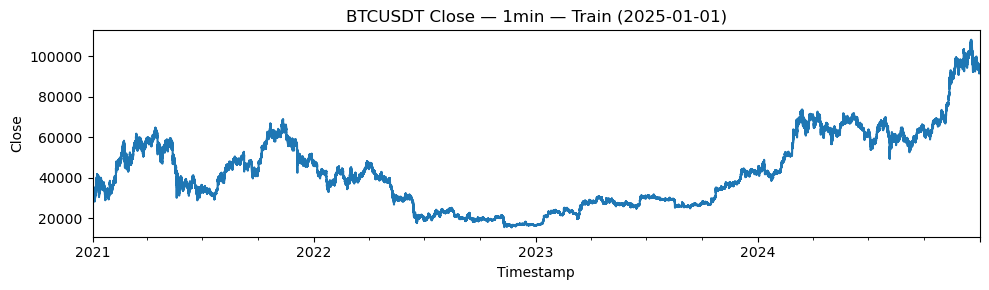

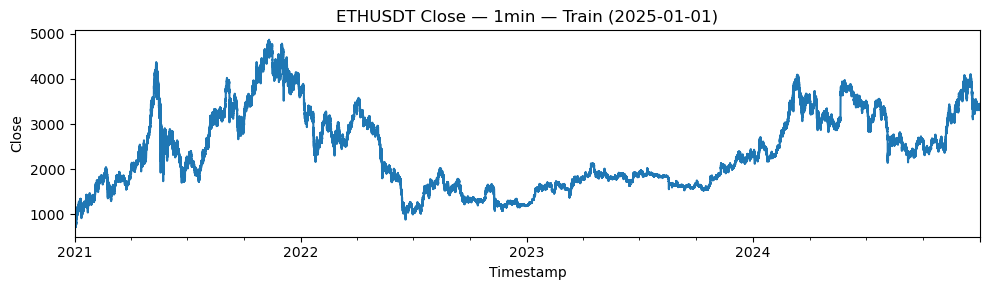

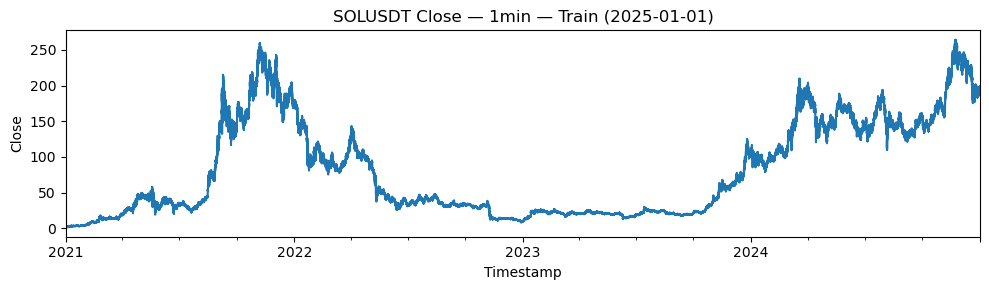

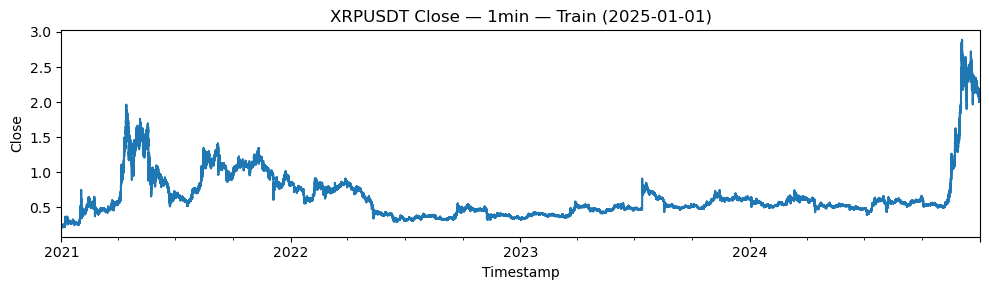

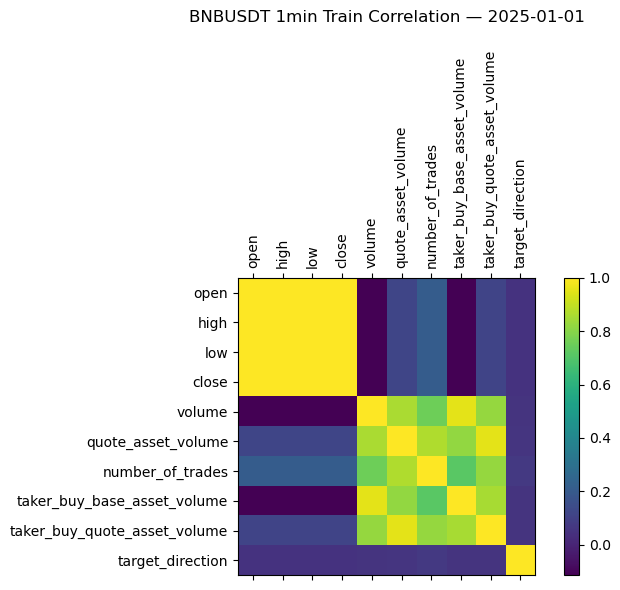

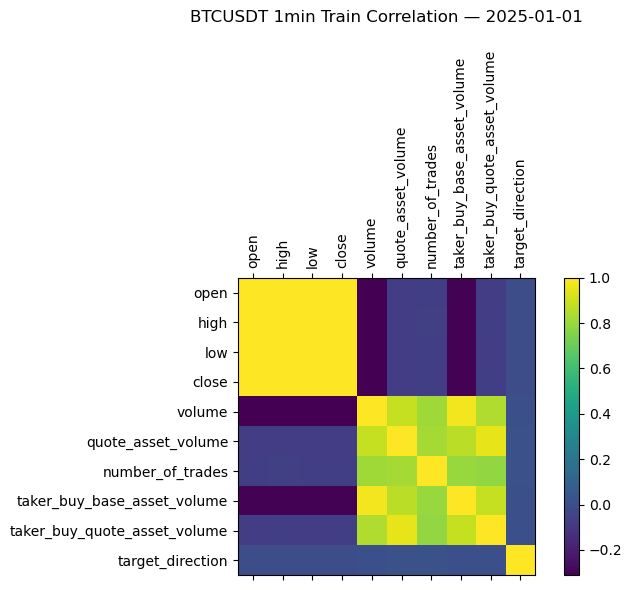

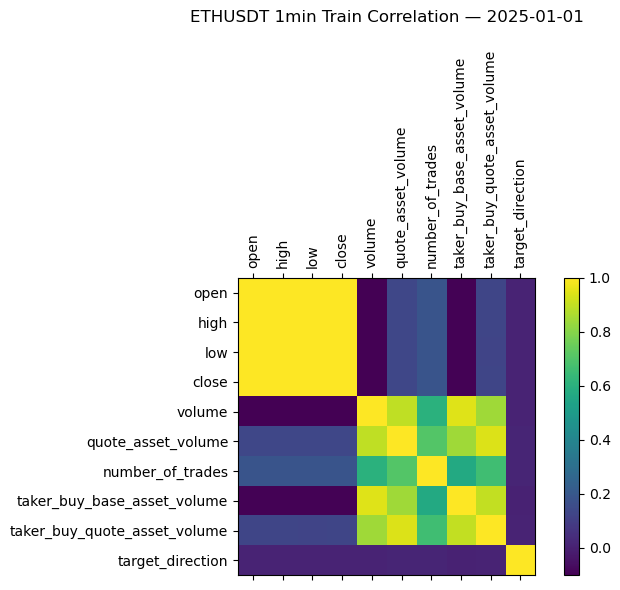

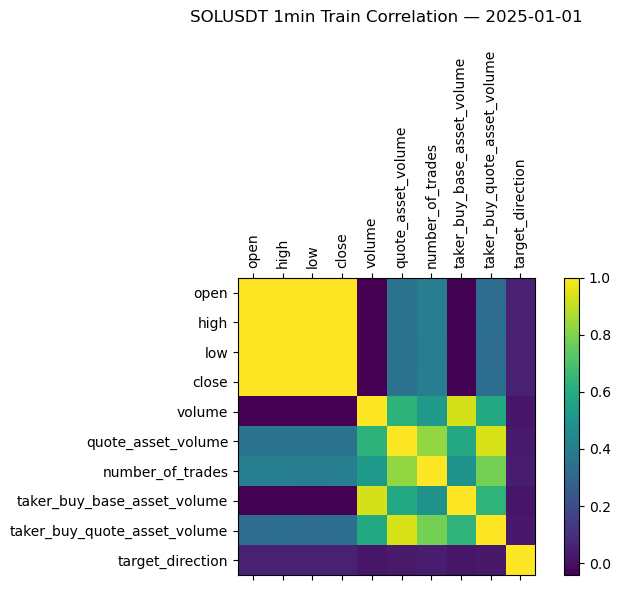

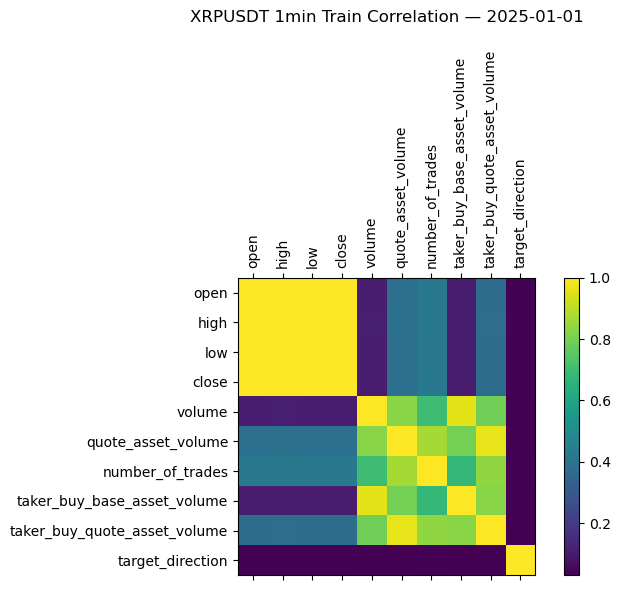


--- Interval: 10min ---

=== Train (2025-01-01) EDA for BNBUSDT @ 10min ===
Total samples: 210384
Target distribution:
target_direction
0    0.523262
1    0.476738
Name: proportion, dtype: float64

Price summary:
          count        mean         std      min         25%      50%    75%  \
open   210384.0  378.031493  150.397433  35.2773  269.700000  324.200  520.1   
high   210384.0  378.816920  150.695618  35.9651  270.133525  324.755  521.2   
low    210384.0  377.177429  150.078610  35.0374  269.200000  323.700  518.8   
close  210384.0  378.026068  150.398006  35.2738  269.700000  324.200  520.1   

          max  
open   792.74  
high   793.86  
low    789.74  
close  792.75  

First 3 rows:
   coin_id           timestamp     open     high      low    close     volume  \
0  BNBUSDT 2021-01-01 00:00:00  37.3596  37.4221  37.0743  37.1082  27014.555   
1  BNBUSDT 2021-01-01 00:10:00  37.1082  37.1546  36.9636  37.1200  13278.507   
2  BNBUSDT 2021-01-01 00:20:00  37.1186  37.130

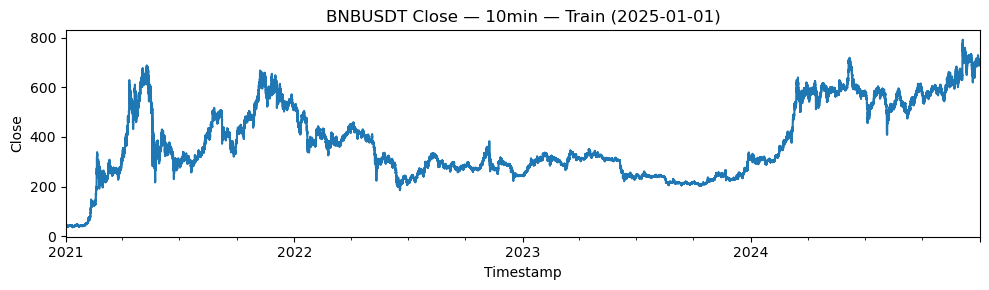

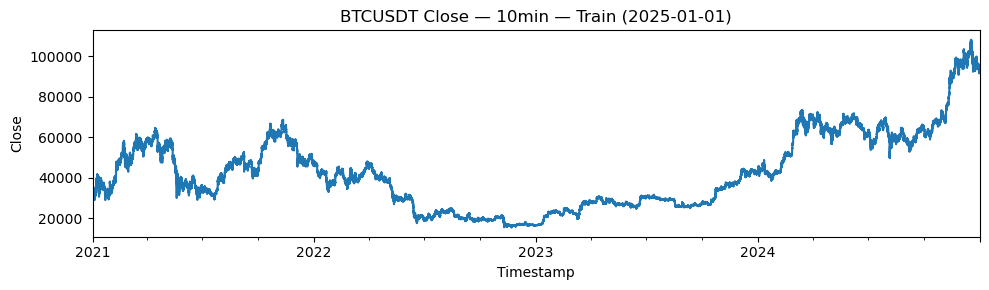

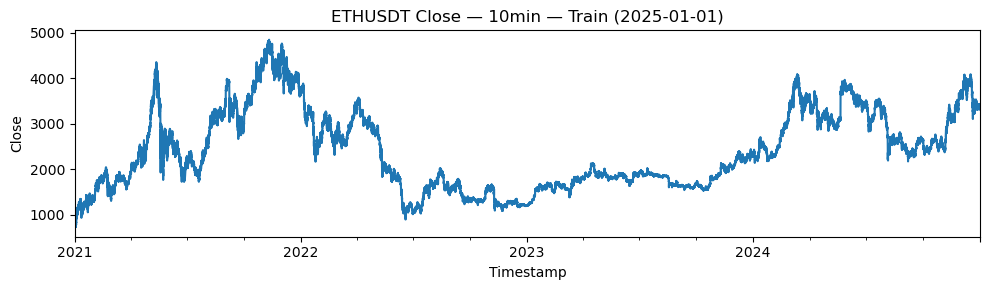

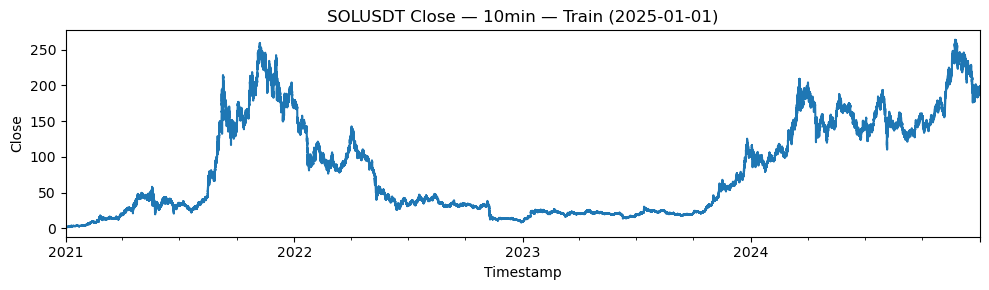

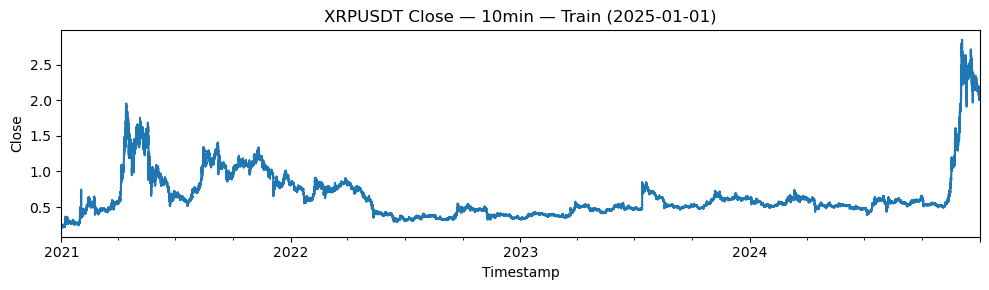

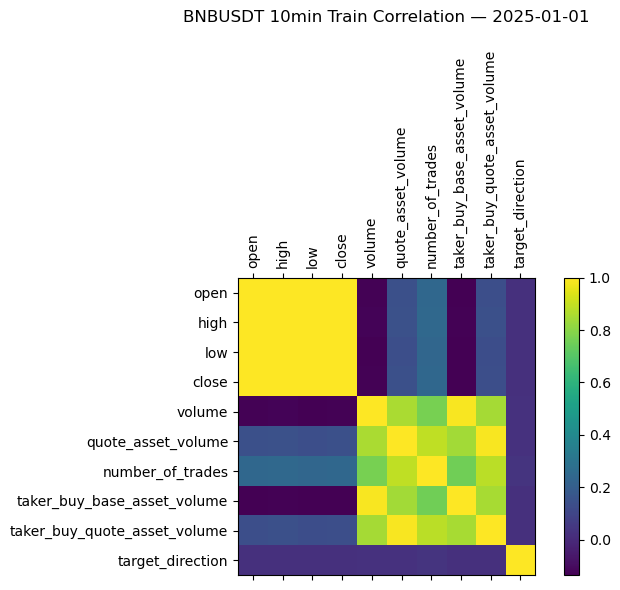

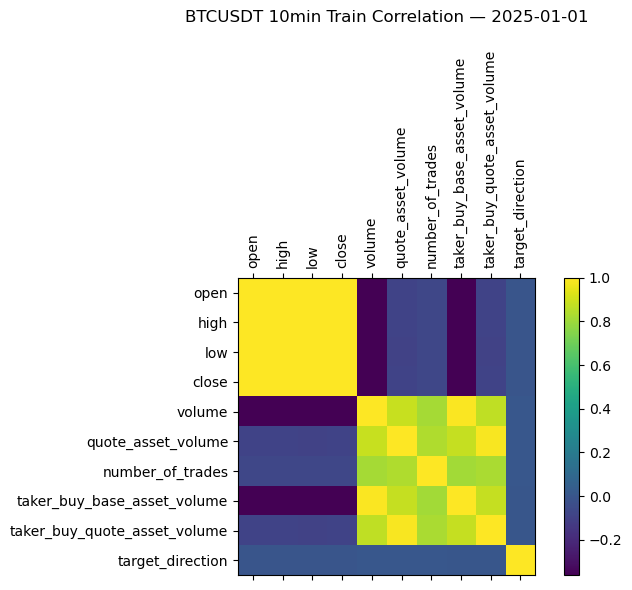

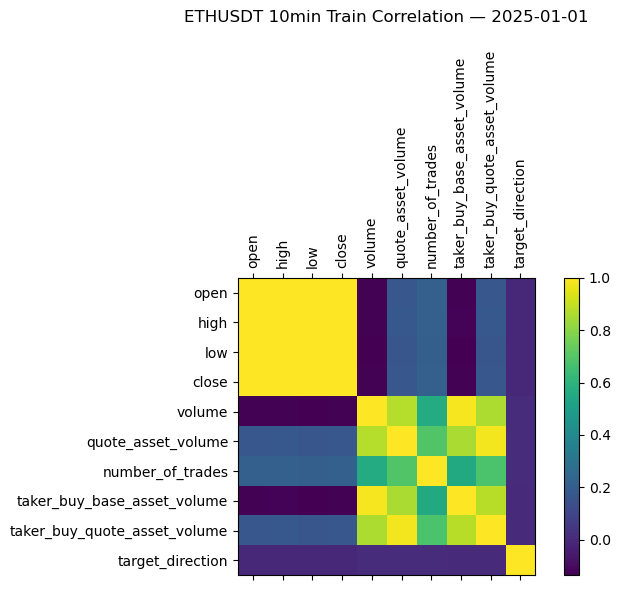

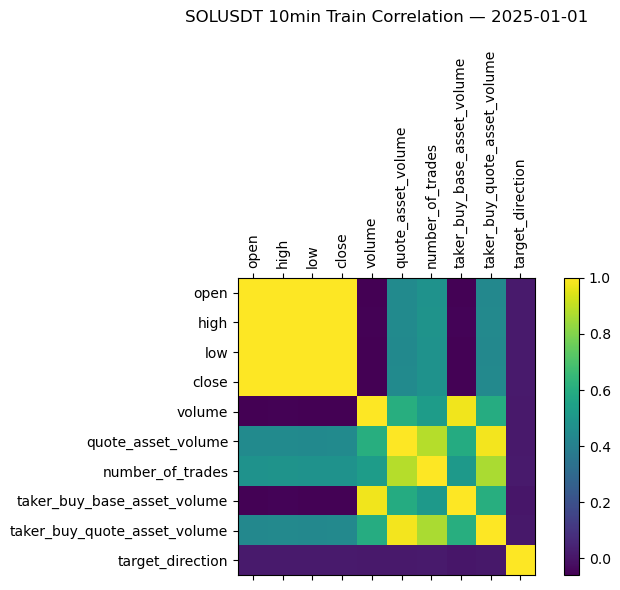

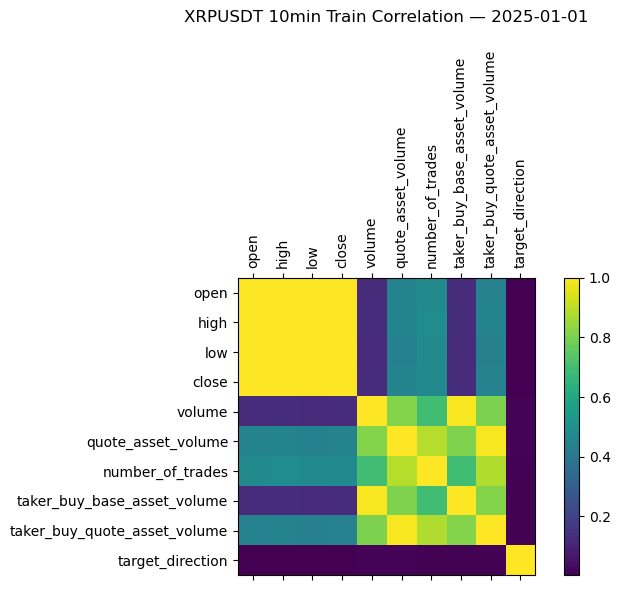


--- Interval: 1h ---

=== Train (2025-01-01) EDA for BNBUSDT @ 1h ===
Total samples: 35064
Target distribution:
target_direction
1    0.50211
0    0.49789
Name: proportion, dtype: float64

Price summary:
         count        mean         std      min    25%    50%    75%     max
open   35064.0  378.031370  150.417035  35.8999  269.8  324.2  520.1  784.20
high   35064.0  380.017511  151.150799  36.8888  271.0  325.7  523.0  793.86
low    35064.0  375.832144  149.554296  35.0374  268.4  322.8  516.7  775.72
close  35064.0  378.038675  150.417155  35.8756  269.8  324.2  520.1  784.20

First 3 rows:
   coin_id           timestamp     open     high      low    close  \
0  BNBUSDT 2021-01-01 00:00:00  37.3596  37.4423  36.9636  37.3764   
1  BNBUSDT 2021-01-01 01:00:00  37.3765  37.9390  37.3353  37.6134   
2  BNBUSDT 2021-01-01 02:00:00  37.6134  37.9730  37.5758  37.9600   

       volume  quote_asset_volume  number_of_trades  \
0   95113.826        3.536712e+06             11167   
1  1

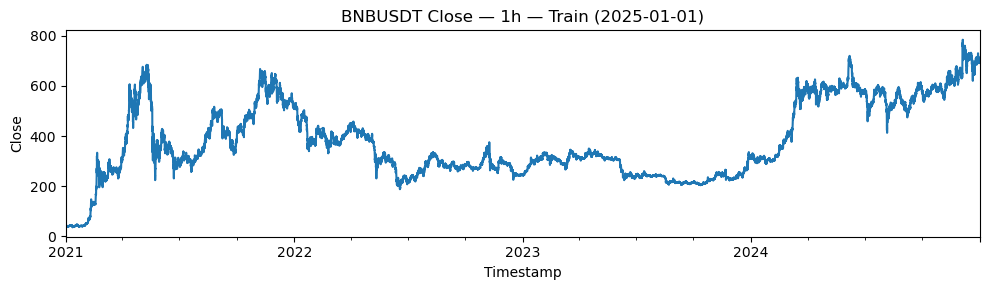

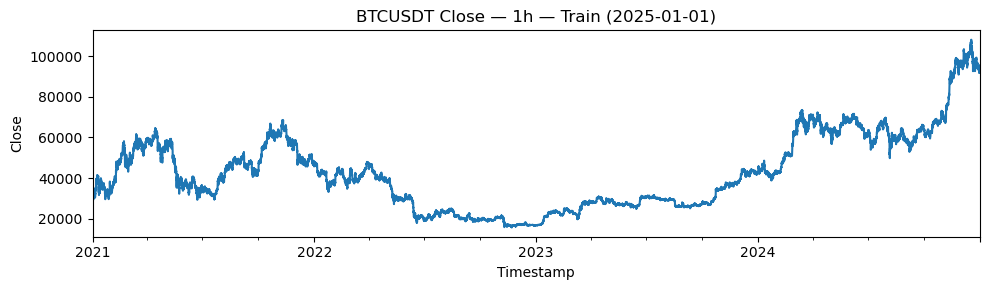

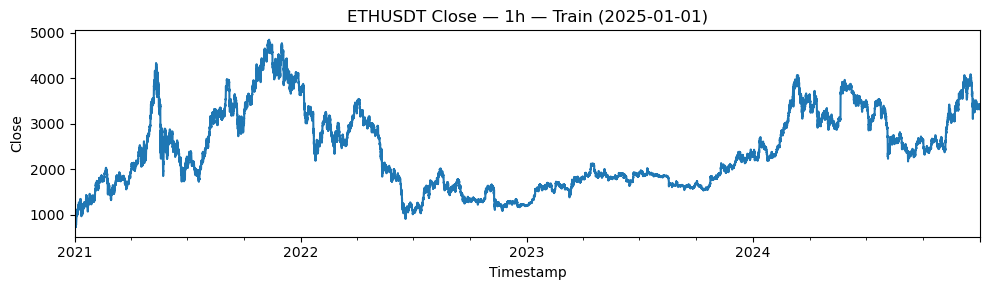

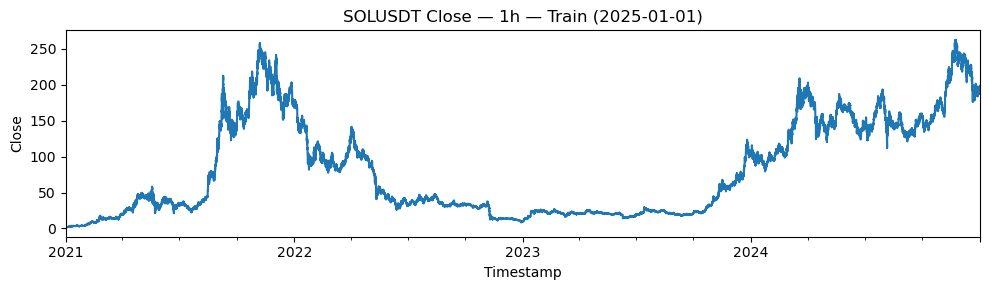

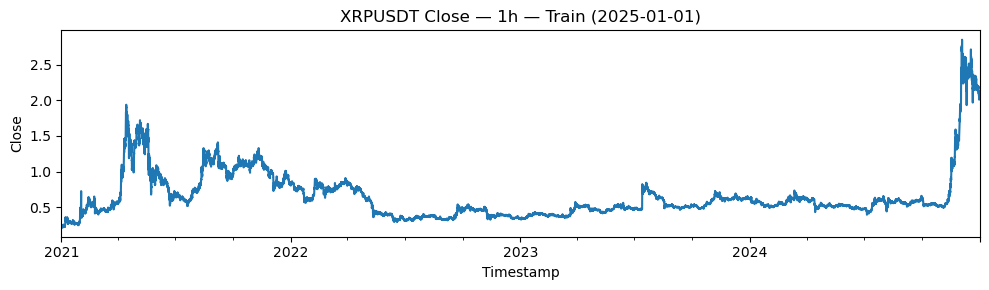

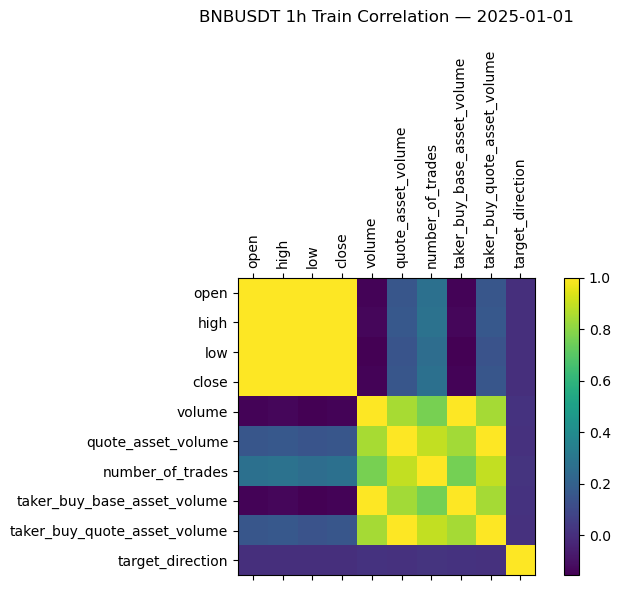

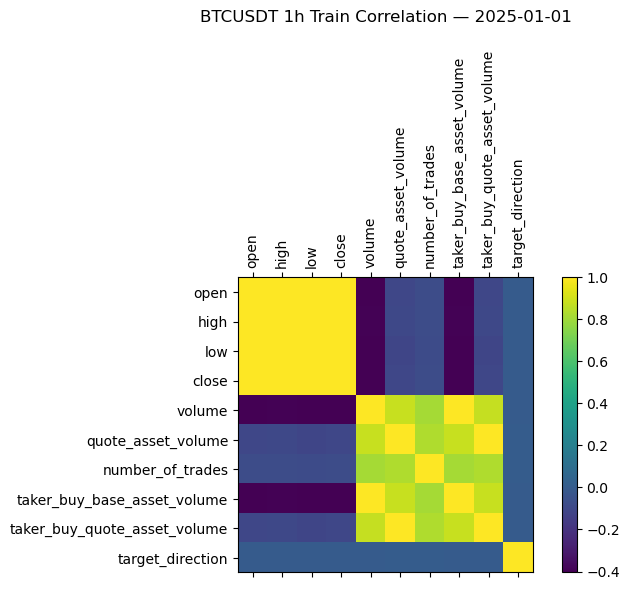

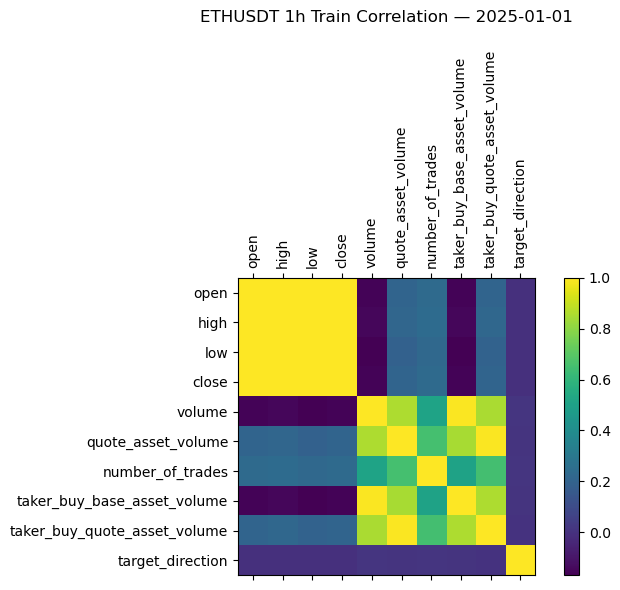

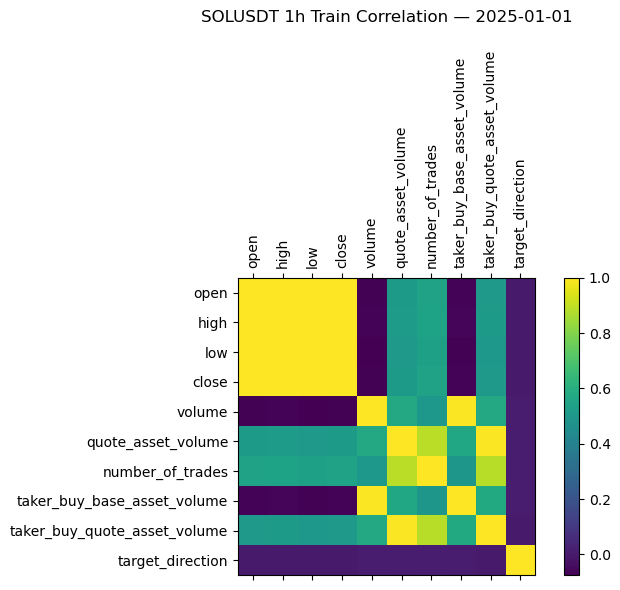

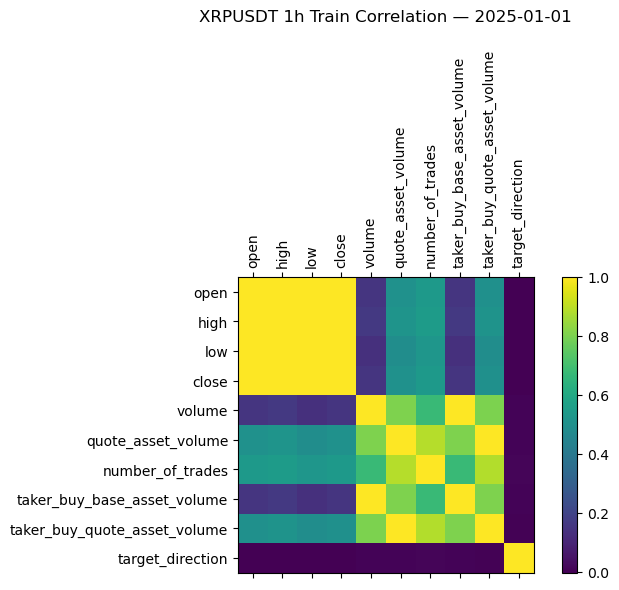


--- Interval: 1d ---

=== Train (2025-01-01) EDA for BNBUSDT @ 1d ===
Total samples: 1461
Target distribution:
target_direction
1    0.516769
0    0.483231
Name: proportion, dtype: float64

Price summary:
        count        mean         std      min       25%    50%    75%     max
open   1461.0  377.749119  150.414818  37.3596  269.4000  323.9  518.8  749.71
high   1461.0  388.239650  154.292046  38.8798  276.6000  333.1  533.8  793.86
low    1461.0  366.378202  146.028757  35.0374  261.0000  316.0  502.3  729.69
close  1461.0  378.187689  150.392845  37.7762  269.7896  324.0  519.2  749.72

First 3 rows:
   coin_id  timestamp     open     high      low    close       volume  \
0  BNBUSDT 2021-01-01  37.3596  38.9590  36.9555  37.7762  2435989.127   
1  BNBUSDT 2021-01-02  37.7637  38.8798  36.8000  38.2331  3018062.206   
2  BNBUSDT 2021-01-03  38.2331  41.7017  37.7630  41.2575  4903626.697   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        9.2358

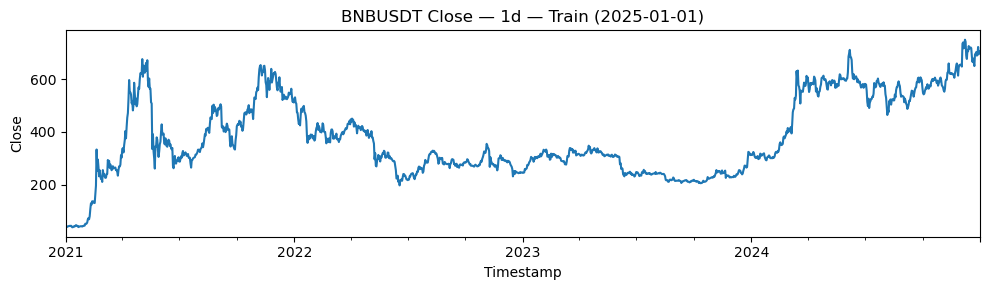

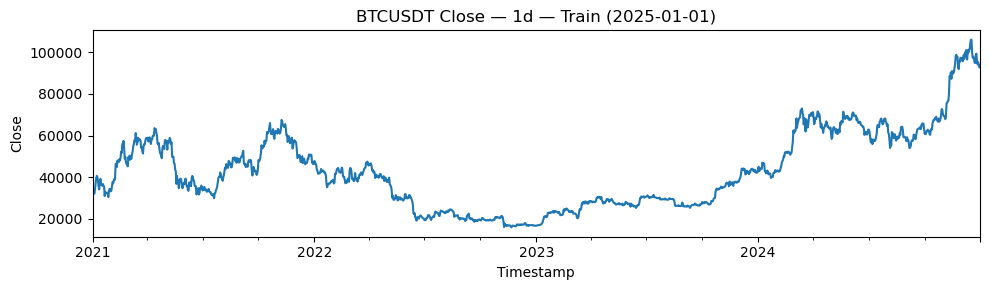

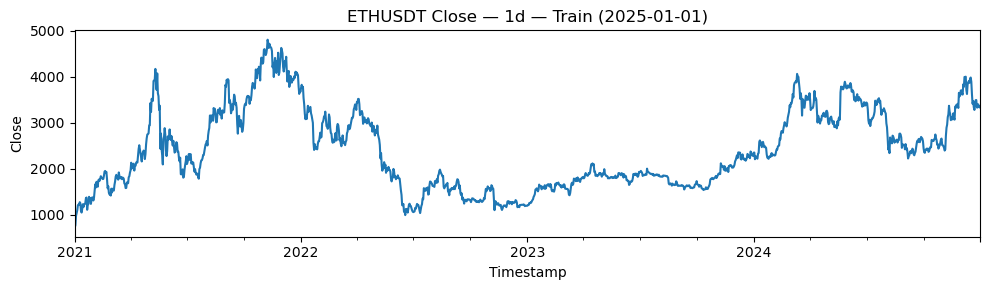

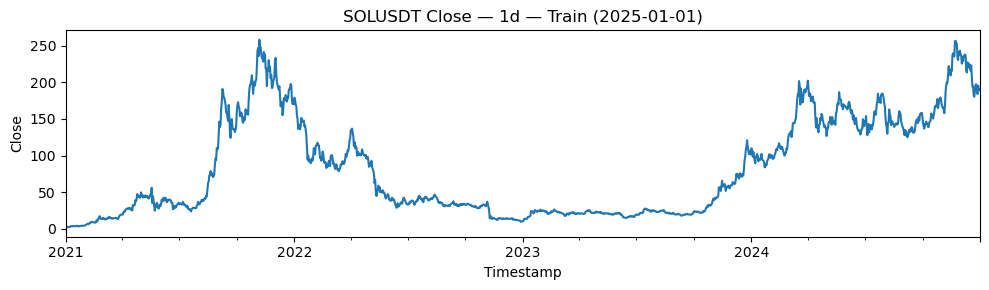

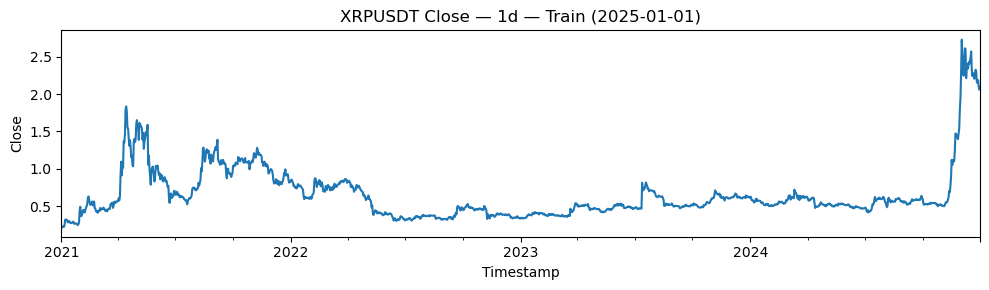

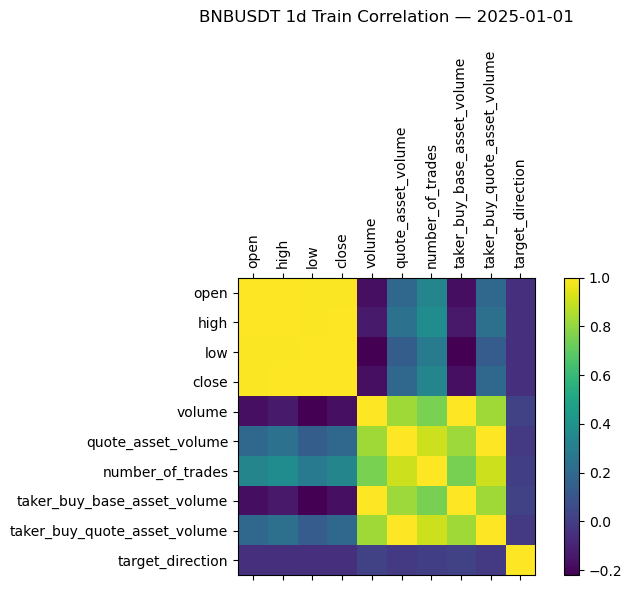

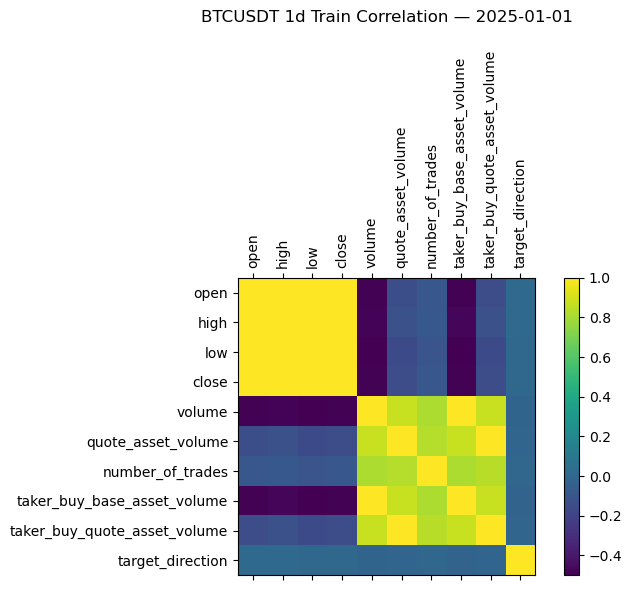

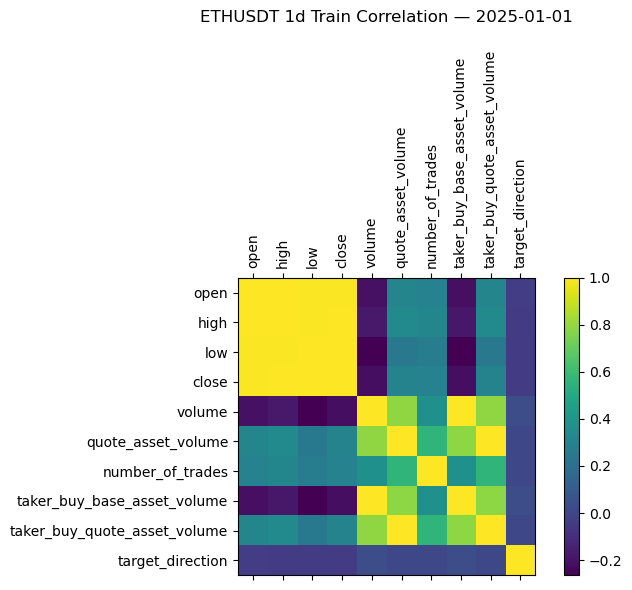

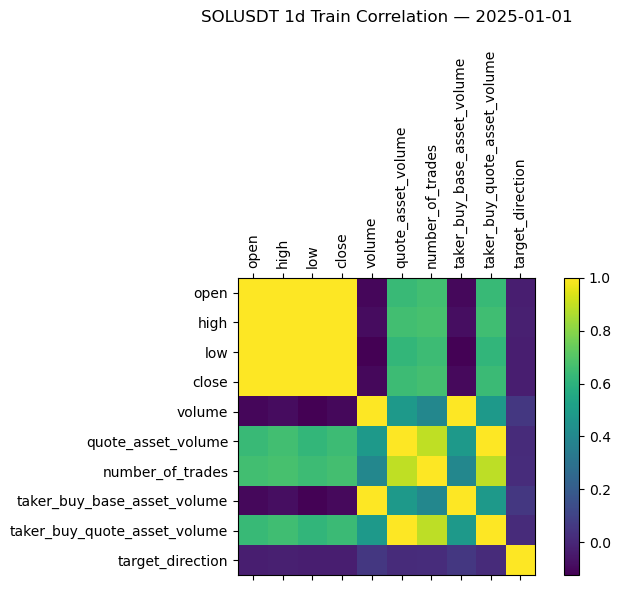

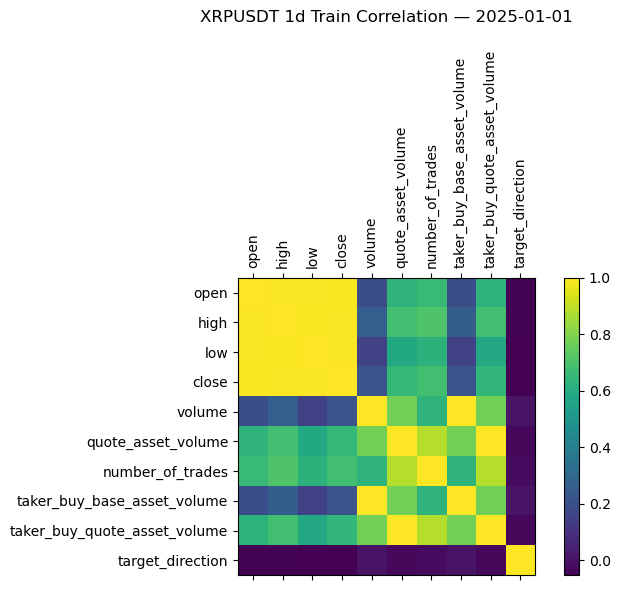

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define the time intervals and the single split
intervals   = ["1min", "10min", "1h", "1d"]
split_label = "2025-01-01"

# 2. Function to load and recompute target_direction
def load_and_prepare(path):
    df = pd.read_parquet(path)
    df.sort_values(["coin_id", "timestamp"], inplace=True)
    df["target_direction"] = (
        df.groupby("coin_id")["close"]
          .shift(-1)
          .gt(df["close"])
          .astype(int)
    )
    df.dropna(subset=["target_direction"], inplace=True)
    return df

# 3. EDA function for printing metrics
def eda_for_coin(df, coin_id, dataset_name, interval):
    df_c = df[df["coin_id"] == coin_id]
    print(f"\n=== {dataset_name} EDA for {coin_id} @ {interval} ===")
    print(f"Total samples: {len(df_c)}")
    print("Target distribution:")
    print(df_c["target_direction"].value_counts(normalize=True))
    print("\nPrice summary:")
    print(df_c[["open","high","low","close"]].describe().T)
    print("\nFirst 3 rows:")
    print(df_c.head(3))
    print("-" * 40)

# 4. Loop over the single split and intervals
print(f"\n\n########## Split: {split_label} ##########")
for interval in intervals:
    print(f"\n--- Interval: {interval} ---")
    # notebook is in EDA/, data/ is sibling to EDA/
    base       = os.path.join("..", "data", "resampled")
    train_path = os.path.join(base, f"train_{interval}.parquet")
    test_path  = os.path.join(base, f"test_{interval}.parquet")

    # load
    train_df = load_and_prepare(train_path)
    test_df  = load_and_prepare(test_path)

    # coin list
    coins = train_df["coin_id"].unique()

    # per-coin EDA
    for coin in coins:
        eda_for_coin(train_df, coin, f"Train ({split_label})", interval)
        eda_for_coin(test_df,  coin, f"Test  ({split_label})", interval)

    # time series plots (train only)
    for coin in coins:
        series = train_df[train_df["coin_id"] == coin] \
                 .set_index("timestamp")["close"]
        plt.figure(figsize=(10,3))
        series.plot(title=f"{coin} Close — {interval} — Train ({split_label})", legend=False)
        plt.xlabel("Timestamp")
        plt.ylabel("Close")
        plt.tight_layout()
        plt.show()

    # correlation heatmaps (train only)
    for coin in coins:
        df_c       = train_df[train_df["coin_id"] == coin]
        numeric_df = df_c.select_dtypes(include="number")
        corr       = numeric_df.corr()

        plt.figure(figsize=(8,6))
        im = plt.matshow(corr, fignum=0)
        plt.colorbar(im)
        labels = corr.columns.tolist()
        ticks  = range(len(labels))
        plt.xticks(ticks, labels, rotation=90)
        plt.yticks(ticks, labels)
        plt.title(f"{coin} {interval} Train Correlation — {split_label}", pad=20)
        plt.tight_layout()
        plt.show()